In [1]:
import pandas as pd
import sys
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

# Precinct Shapefile

## VEST's Documentation File

Election results and precinct shapefile from the Minnesota Secretary of State (https://gisdata.mn.gov/dataset/bdry-electionresults-2012-2020)

- G16PRERTru - Donald J. Trump (Republican Party)
- G16PREDCli - Hillary Clinton (Democratic-Farmer-Labor Party)
- G16PRECCas - Darrell L. Castle (Constitution Party)
- G16PREMVac - Dan R. Vacek (Legal Marijuana Now Party)
- G16PRESKen - Alyson Kennedy (Socialist Workers Party)
- G16PREGSte - Jill Stein (Green Party)
- G16PREIDeL - Roque De La Fuente (American Delta Party)
- G16PREIMcM - Evan McMullin (Independence Party)
- G16PRELJoh - Gary Johnson (Libertarian Party)
- G16PREOth - Write-in Votes

## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/mn_2016/mn_2016.shp")

In [3]:
vest_shp.shape

(4120, 19)

In [4]:
vest_shp.head(1)

,VTDID,PCTNAME,PCTCODE,SHORTLABEL,MCDNAME,MCDCODE,MCDFIPS,MCDGNIS,G16PRERTru,G16PREDCli,G16PRECCas,G16PREMVac,G16PRESKen,G16PREGSte,G16PREIDeL,G16PREIMcM,G16PRELJoh,G16PREOth,geometry
0,270010005,Aitkin,0005,None,Aitkin,004,00460,02393894,552,358,3,7,1,2,0,21,36,6,"POLYGON ((447378.031 5154733.389, 448085.138 5..."


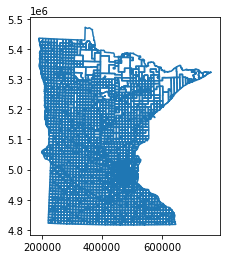

In [5]:
vest_shp.boundary.plot()

# Load the SOS File

In [6]:
gdf = gp.read_file('./raw-from-source/SOS/shp_bdry_electionresults_2012_2020/general_election_results_by_precinct_2016.shp')

In [7]:
gdf.head()

,VTDID,PCTNAME,PCTCODE,SHORTLABEL,MCDNAME,MCDCODE,MCDFIPS,MCDGNIS,CTU_TYPE,COUNTYNAME,...,MNLEGDFL,MNLEGWI,MNLEGTOTAL,MNCA1YES,MNCA1NO,MNCA1EST,MNCA1TOTAL,Shape_Leng,Shape_Area,geometry
0,270010005,Aitkin,0005,None,Aitkin,004,00460,02393894,city,Aitkin,...,411,0,972,731,224,45,1000,31638.833260,6.629747e+06,"POLYGON ((447378.031 5154733.389, 448085.138 5..."
1,270010010,Aitkin Twp,0010,None,Aitkin Twp,005,00478,00663389,township,Aitkin,...,173,0,543,438,95,17,550,67719.452182,8.780913e+07,"MULTIPOLYGON (((445904.069 5151658.489, 445903..."
2,270010015,Ball Bluff Twp,0015,None,Ball Bluff Twp,015,03358,00663498,township,Aitkin,...,79,0,158,131,32,1,164,38301.248800,9.148057e+07,"POLYGON ((485475.521 5207980.031, 485475.766 5..."
3,270010020,Balsam Twp,0020,None,Balsam Twp,020,03412,00663499,township,Aitkin,...,11,0,19,15,2,2,19,38988.094778,9.517941e+07,"POLYGON ((495441.473 5188825.678, 495423.020 5..."
4,270010025,Beaver Twp,0025,None,Beaver Twp,025,04384,00663536,township,Aitkin,...,23,0,34,31,6,0,37,38288.614190,9.135949e+07,"POLYGON ((495765.091 5140614.891, 494153.670 5..."


In [8]:
gdf.columns

Index(['VTDID', 'PCTNAME', 'PCTCODE', 'SHORTLABEL', 'MCDNAME', 'MCDCODE',
       'MCDFIPS', 'MCDGNIS', 'CTU_TYPE', 'COUNTYNAME', 'COUNTYCODE',
       'COUNTYFIPS', 'CONGDIST', 'MNSENDIST', 'MNLEGDIST', 'CTYCOMDIST',
       'JUDDIST', 'SWCDIST', 'SWCDIST_N', 'WARD', 'HOSPDIST', 'HOSPDIST_N',
       'PARKDIST', 'PARKDIST_N', 'TABSYSTEM', 'TABMODEL', 'MAILBALLOT',
       'REG7AM', 'SIGNATURES', 'EDR', 'AB_MB', 'FEDONLYAB', 'PRESONLYAB',
       'TOTVOTING', 'USPRSR', 'USPRSDFL', 'USPRSCP', 'USPRSLMN', 'USPRSSWP',
       'USPRSGP', 'USPRSADP', 'USPRSIP', 'USPRSLIB', 'USPRSWI', 'USPRSTOTAL',
       'USREPR', 'USREPDFL', 'USREPWI', 'USREPTOTAL', 'MNSENR', 'MNSENDFL',
       'MNSENWI', 'MNSENTOTAL', 'MNLEGR', 'MNLEGDFL', 'MNLEGWI', 'MNLEGTOTAL',
       'MNCA1YES', 'MNCA1NO', 'MNCA1EST', 'MNCA1TOTAL', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')

The SOS file already has election results and the precinct shapefile joined together. 

In [9]:
gdf.columns = ['VTDID', 'PCTNAME', 'PCTCODE', 'SHORTLABEL', 'MCDNAME', 'MCDCODE',
       'MCDFIPS', 'MCDGNIS', 'CTU_TYPE', 'COUNTYNAME', 'COUNTYCODE',
       'COUNTYFIPS', 'CONGDIST', 'MNSENDIST', 'MNLEGDIST', 'CTYCOMDIST',
       'JUDDIST', 'SWCDIST', 'SWCDIST_N', 'WARD', 'HOSPDIST', 'HOSPDIST_N',
       'PARKDIST', 'PARKDIST_N', 'TABSYSTEM', 'TABMODEL', 'MAILBALLOT',
       'REG7AM', 'SIGNATURES', 'EDR', 'AB_MB', 'FEDONLYAB', 'PRESONLYAB',
       'TOTVOTING', 'G16PRERTru', 'G16PREDCli', 'G16PRECCas', 'G16PREMVac', 'G16PRESKen',
       'G16PREGSte', 'G16PREIDeL', 'G16PREIMcM', 'G16PRELJoh', 'G16PREOth', 'USPRSTOTAL',
       'USREPR', 'USREPDFL', 'USREPWI', 'USREPTOTAL', 'MNSENR', 'MNSENDFL',
       'MNSENWI', 'MNSENTOTAL', 'MNLEGR', 'MNLEGDFL', 'MNLEGWI', 'MNLEGTOTAL',
       'MNCA1YES', 'MNCA1NO', 'MNCA1EST', 'MNCA1TOTAL', 'Shape_Leng',
       'Shape_Area', 'geometry']

# Join Files

In [10]:
print(vest_shp.shape)
print(gdf.shape)

(4120, 19)
(4120, 64)


In [12]:
merged_df = vest_shp.merge(gdf, how = 'outer', on = 'VTDID', indicator = True)
merged_df.groupby('_merge').count()

,VTDID,PCTNAME_x,PCTCODE_x,SHORTLABEL_x,MCDNAME_x,MCDCODE_x,MCDFIPS_x,MCDGNIS_x,G16PRERTru_x,G16PREDCli_x,...,MNLEGDFL,MNLEGWI,MNLEGTOTAL,MNCA1YES,MNCA1NO,MNCA1EST,MNCA1TOTAL,Shape_Leng,Shape_Area,geometry_y
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,4120,4120,4120,1719,4120,4120,4120,4120,4120,4120,...,4120,4120,4120,4120,4120,4120,4120,4120,4120,4120


# Validating Election Results

## Statewide

In [13]:
vest_shp.columns

Index(['VTDID', 'PCTNAME', 'PCTCODE', 'SHORTLABEL', 'MCDNAME', 'MCDCODE',
       'MCDFIPS', 'MCDGNIS', 'G16PRERTru', 'G16PREDCli', 'G16PRECCas',
       'G16PREMVac', 'G16PRESKen', 'G16PREGSte', 'G16PREIDeL', 'G16PREIMcM',
       'G16PRELJoh', 'G16PREOth', 'geometry'],
      dtype='object')

In [14]:
data_columns = ['G16PRERTru', 'G16PREDCli', 'G16PRECCas',
       'G16PREMVac', 'G16PRESKen', 'G16PREGSte', 'G16PREIDeL', 'G16PREIMcM',
       'G16PRELJoh', 'G16PREOth']

print("Printing differences below")
for race in data_columns:
    if (sum(vest_shp[race])- gdf[race].sum() != 0):
        print(race+" has a difference of "+str(sum(vest_shp[race])-gdf[race].sum())+" votes")
        print("\tVEST: "+str(sum(vest_shp[race]))+" votes")
        print("\tSOURCES: "+str(gdf[race].sum())+" votes")
    else:
        print(race + " is equal", "\tVEST: " + str(sum(vest_shp[race])), "\tRDH: " + str(gdf[race].sum()))
print("")
print("All other races are equal")


Printing differences below
G16PRERTru is equal 	VEST: 1322951 	RDH: 1322951
G16PREDCli is equal 	VEST: 1367716 	RDH: 1367716
G16PRECCas is equal 	VEST: 9456 	RDH: 9456
G16PREMVac is equal 	VEST: 11291 	RDH: 11291
G16PRESKen is equal 	VEST: 1672 	RDH: 1672
G16PREGSte is equal 	VEST: 36985 	RDH: 36985
G16PREIDeL is equal 	VEST: 1431 	RDH: 1431
G16PREIMcM is equal 	VEST: 53076 	RDH: 53076
G16PRELJoh is equal 	VEST: 112972 	RDH: 112972
G16PREOth is equal 	VEST: 27263 	RDH: 27263

All other races are equal


## County-by-County Totals

Skipping the county by county totals because VEST did not keep the county field on their file.

## Precinct-by-Precinct Totals

In [18]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["VTDID"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["VTDID"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["VTDID"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)
    
validater_row(merged_df,data_columns)



There are  4120  total rows
0  of these rows have election result differences
4120  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 10
[]
